<a href="https://colab.research.google.com/github/Mohd6288/AI/blob/main/Copy_of_lab_3_IMDB_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The IMDB Dataset

---

### Colab Note

Don't forget that you can link your notebook to your drive and save your work there. Then you can download and backup your models, reload them to keep training them, or upload datasets to your drive.

In [1]:
import os
import sys

if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('drive/My Drive/') # 'My Drive' is the default name of Google Drives
    os.listdir()

# use os.chdir("my-directory") # to change directory, and
# os.listdir()                 # to list its contents
# os.getcwd()                  # to get the name of the current directory
# os.mkdir("my-new-dir")       # to create a new directory
# See: https://realpython.com/working-with-files-in-python/

# You can also use bash commands directly, preceded by a bang
# !ls
# However, the following will *not* change the Python directory
# the notebook points to (use os.chdir for that)!
# !cd my-directory

MessageError: Error: credential propagation was unsuccessful

---

## 1. Theory

Make sure you understand the first video of 3Blue1Brown's introduction to neural nets, and ask questions if there's anything unclear.

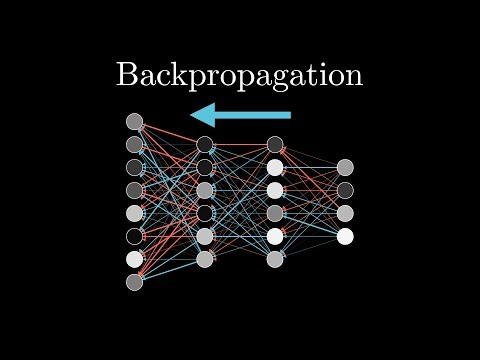

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ilg3gGewQ5U', width=853, height=480) # 3Blue1Brown 3

The fourth video is optional.

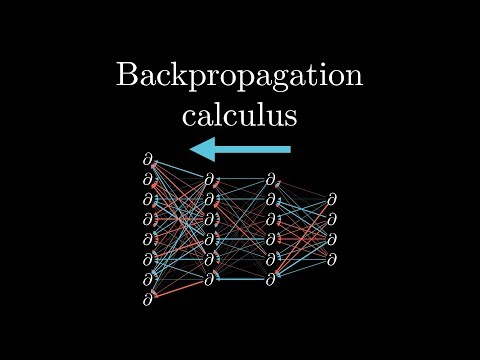

In [3]:
YouTubeVideo('tIeHLnjs5U8', width=853, height=480) # 3Blue1Brown 4

---

## 2. Practice

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### For reproducible results

In Keras ([source](https://keras.io/examples/keras_recipes/reproducibility_recipes/)):
```python
tf.keras.utils.set_random_seed(812) # See below

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()
```

Note: `tf.keras.utils.set_random_seed` will do the following ([source](https://github.com/keras-team/keras/blob/f6c4ac55692c132cd16211f4877fac6dbeead749/keras/src/utils/rng_utils.py#L10)):

```python
import random
random.seed(42)

import numpy as np
np.random.seed(42)

tf.random.set_seed(42) # can be any number
```

### Experiments

- Experiment with only one layer, then with more (deeper net);
- Experiment with more or fewer hidden units – 32 units, 64 units etc.
  - One nice challenge is to see how good your results get with a bigger network, then see if you can get to the same level with a smaller one by training longer, or tweaking the learning rate/changing the optimizer;
  - Another is to see how good a result you can get with a fixed number of epochs (e.g. 5);
- Experiment with replacing `relu` with `tanh` activations;
- Try the [`Adam` optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers#classes_2): `optimizers.Adam(learning_rate=0.001)`
- Investigate the effect of different learning rates;
- Investigate the effect of a smaller (or bigger) batch size;
- Train for more epochs, or, conversely, set a number of epochs (say 5), and see how good you can get your model in just these 5 epochs.

**Think about how to record and organise your experiments in a neat way!**

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results


# load the IMDB dataset (max review length
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

# preprocess
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# split training set into train & validation
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]
x_val = x_train[:10000]
y_val = y_train[:10000]

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# build
model = tf.keras.models.Sequential()
model.add(tf.keras.Input((10000,)))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

Sanity check, how does our network perform before training (use `.evaluate` on `partial_x_train, partial_y_train`). Is the accuracy a value you would expect?

In [7]:
results = model.evaluate(x_test, y_test, verbose=0) # test our untrained net.

print(f"loss: {results[0]}, accuracy: {results[1]}")


loss: 0.6978426575660706, accuracy: 0.4999200105667114


Now we can train.

In [8]:
# save data from training into the 'history' object
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val),
)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7331 - loss: 0.5323 - val_accuracy: 0.8479 - val_loss: 0.3576
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9219 - loss: 0.2202 - val_accuracy: 0.8884 - val_loss: 0.2775
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9414 - loss: 0.1580 - val_accuracy: 0.8721 - val_loss: 0.3315
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9606 - loss: 0.1162 - val_accuracy: 0.8777 - val_loss: 0.3481
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9741 - loss: 0.0860 - val_accuracy: 0.8780 - val_loss: 0.3674
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9808 - loss: 0.0639 - val_accuracy: 0.8589 - val_loss: 0.4801
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9878 - loss: 0.0414 - val_accuracy: 0.8725 - val_loss: 0.4699
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9912 - loss: 0.0313 - val_accu

In [9]:
results = model.evaluate(x_test, y_test, verbose=0) # test our untrained net.

print(f"loss: {results[0]}, accuracy: {results[1]}")


loss: 1.3442217111587524, accuracy: 0.8535599708557129


### Visualise your results

Thanks to these plots, it is easier to spot the epoch (epoch number) where our net reached peak performance (lowest *validation loss*/highest *validation accuracy*, prioritising accuracy if the two are not the same).

Think about what would be a good strategy to keep your code as organised as possible as you run many experiments?

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [11]:
history_dict["loss"]

[0.42308294773101807,
 0.2209569662809372,
 0.1617908626794815,
 0.12272339314222336,
 0.09334665536880493,
 0.0687028169631958,
 0.04965147376060486,
 0.03429076448082924,
 0.024626849219202995,
 0.015360047109425068,
 0.008704407140612602,
 0.005199706181883812,
 0.0038374592550098896,
 0.0018851208733394742,
 0.0019616191275417805,
 0.0007628028397448361,
 0.00042537591070868075,
 0.0003031119122169912,
 0.00022174252080731094,
 0.00016946412506513298]

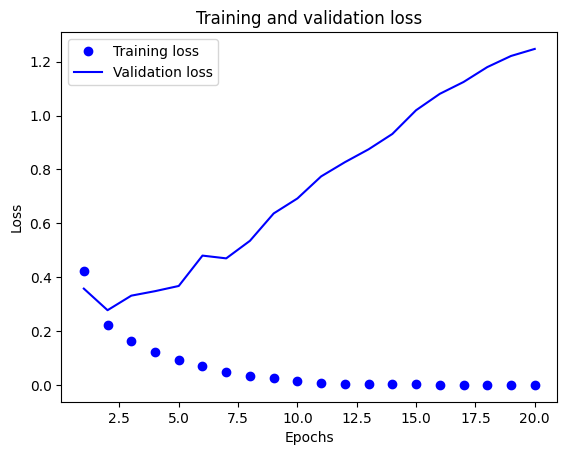

In [12]:
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)

blue_dots = "bo"
solid_blue_line = "b"

plt.plot(epochs, loss, blue_dots, label="Training loss")
plt.plot(epochs, val_loss, solid_blue_line, label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [13]:
history_dict["accuracy"]

[0.8218666911125183,
 0.9173333048820496,
 0.9393333196640015,
 0.9565333127975464,
 0.9691333174705505,
 0.9773333072662354,
 0.9833333492279053,
 0.989799976348877,
 0.9929333329200745,
 0.996666669845581,
 0.998533308506012,
 0.9990666508674622,
 0.9994000196456909,
 0.9999333620071411,
 0.9995999932289124,
 0.9999333620071411,
 0.9999333620071411,
 0.9999333620071411,
 0.9999333620071411,
 0.9999333620071411]

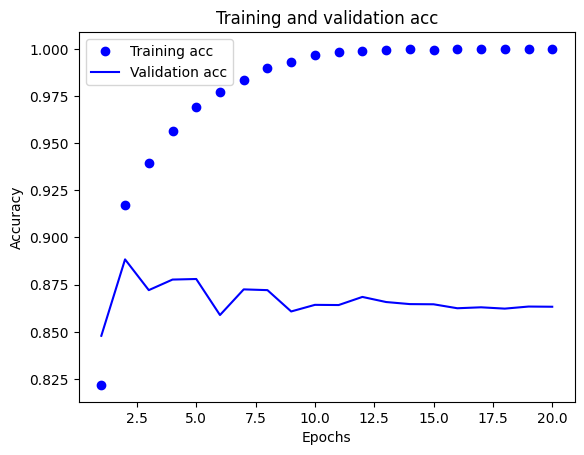

In [14]:
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1, len(acc) + 1)

blue_dots = "bo"
solid_blue_line = "b"

plt.plot(epochs, acc, blue_dots, label="Training acc")
plt.plot(epochs, val_acc, solid_blue_line, label="Validation acc")
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

Can you think of a way to making the plotting code above more re-usable, when training multiple models?

### Tuning / Research

Here's where you research would take place:
- train new models;
- keep track of your results (e.g. in a Markdown table);
- take notes about what the aim of your experiment is, and what you end up finding.

In [24]:
# build
model = tf.keras.models.Sequential()
model.add(tf.keras.Input((10000,)))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,),
   loss=tf.keras.losses.binary_crossentropy,
    metrics=["accuracy"]
)

# save data from training into the 'history' object
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val),
)

results = model.evaluate(x_test, y_test, verbose=0) # test our untrained net.

print(f"loss: {results[0]}, accuracy: {results[1]}")

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7399 - loss: 0.5437 - val_accuracy: 0.8895 - val_loss: 0.2836
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9311 - loss: 0.1978 - val_accuracy: 0.8868 - val_loss: 0.2872
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9655 - loss: 0.1167 - val_accuracy: 0.8783 - val_loss: 0.3257
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9792 - loss: 0.0769 - val_accuracy: 0.8763 - val_loss: 0.3847
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9916 - loss: 0.0442 - val_accuracy: 0.8722 - val_loss: 0.4334
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9969 - loss: 0.0248 - val_accuracy: 0.8731 - val_loss: 0.5040
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9990 - loss: 0.0137 - val_accuracy: 0.8715 - val_loss: 0.5551
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9998 - loss: 0.0065 - val_accu

## 3. Conclusion

Take your best network and train on **all the training data** (`x_train`, `y_train`), without a train/validation split, using the same hyperparameters (optimizer, learning rate, network size, etc.) as your best run, for the optimal number of epochs (looking at your best validation curves).

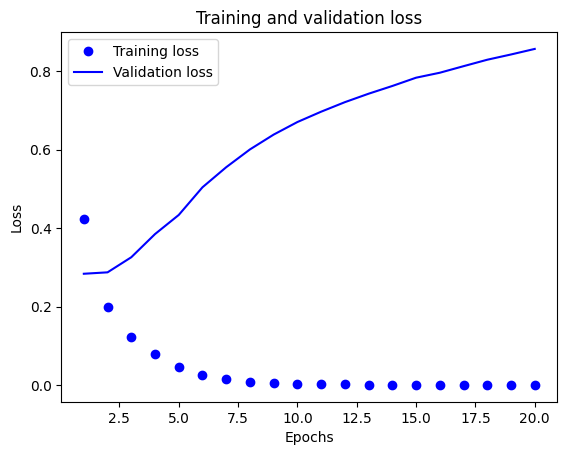

In [26]:
history_dict = history.history
history_dict.keys()

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)

blue_dots = "bo"
solid_blue_line = "b"

plt.plot(epochs, loss, blue_dots, label="Training loss")
plt.plot(epochs, val_loss, solid_blue_line, label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [30]:
history_dict["val_accuracy"]
print(max(history_dict["val_accuracy"]))

0.8895000219345093


Evaluate this last model on the test set (`x_test, y_test`).

### Use your model (optional)

Can you import the lecture code used to test the model on a review, and see if you agree with its prediction?

### Save and load models

To save and load models locally, you can use [the high-level API](https://www.tensorflow.org/tutorials/keras/save_and_load):
```python
model.save("my_imdb_model.keras")
```
Later one, to reload it, use:
```python
reloaded_model = tf.keras.models.load_model('my_imdb_model.keras')
```

It is also possible to save not just the model, but also the state of your optimiser, and every variable used during training, using the morer involved [checkpoints](https://www.tensorflow.org/guide/checkpoint#create_the_checkpoint_objects).

## 4. Additional experiments

- One parameter you could study is the influence on the vocabulary size on the final results: you might then want to store the vocab size in a variable, and use that instead of the hard-coded `10000` that we have.
- It would be entirely possible to approach the same problem as if you were detecting two classes (`0` for negative, `1` for positive), instead of using just a single output. In order to implement that, you would need:
   1. two units in your final layer with a `softmax` activation;
   2. `categorical_crossentropy` as a loss;
   3. labels as one-hot vectors (using `tf.keras.utils.to_categorical`);
   4. and `np.argmax` (instead of `round`) to retrieve the likeliest class (the index) when making predictions.
- Another line of enquiry is the study of the behaviour of your trained model:
  - Are you able to modify existing reviews in a way that changes the initial prediction of your model? (One 'automated' way of doing that would be to remove a certain number of words from the review, and see how performance is impacted by that information loss.)
  - Are you able to create a pipeline where you write your own review, or find one online, transform it into the appropriate format (remove punctuation, turn everything to lower case, convert to an array of integers using the dictionary yielded by `tf.keras.datasets.imdb.get_word_index()` (beware of the shift by 3 induced by the reserved tokens for padding, start of sequence and unknown!), and see what prediction you get for it?